In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [317]:
df = pd.read_csv("dataset/electronicItem.csv")
df.head()

,product_name,product_price,product_image,product_link,product_store,product_category,product_ratings,rating_count,description,date
0,Mibro A2 Bluetooth Calling Smart Watch,"Rs. 8,299",https://images.priceoye.pk/mibro-a2-bluetooth-...,https://priceoye.pk/smart-watches/mibro/mibro-...,PriceOye,"Smart-Watches, Mibro",5.0,8 Ratings,"{'Display': '1.39 inches', 'Screen Type': 'HD ...",2023-12-03
1,Mibro Watch Lite2,"Rs. 12,999",https://images.priceoye.pk/mibro-watch-lite2-p...,https://priceoye.pk/smart-watches/mibro/mibro-...,PriceOye,"Smart-Watches, Mibro",5.0,79 Ratings,"{'Display': '1.3 Inches', 'Screen Type': 'Amol...",2023-12-03
2,Mibro GS Pro Calling Smart Watch,"Rs. 15,999",https://images.priceoye.pk/mibro-gs-pro-callin...,https://priceoye.pk/smart-watches/mibro/mibro-...,PriceOye,"Smart-Watches, Mibro",5.0,5 Ratings,"{'Display': '1.43', 'Screen Type': 'AMOLED', '...",2023-12-03
3,Mibro T1 Smart Watch,"Rs. 13,999",https://images.priceoye.pk/mibro-t1-pakistan-p...,https://priceoye.pk/smart-watches/mibro/mibro-t1,PriceOye,"Smart-Watches, Mibro",5.0,79 Ratings,"{'Display': '1.6 Inch', 'Screen Type': 'AMOLED...",2023-12-03
4,Mibro Smart Watch T2,"Rs. 13,999",https://images.priceoye.pk/mibro-smart-watch-t...,https://priceoye.pk/smart-watches/mibro/mibro-...,PriceOye,"Smart-Watches, Mibro",5.0,1 Ratings,"{'Display': '1.75 Inches', 'Screen Type': 'AMO...",2023-12-03


In [318]:
df.isnull().sum()

product_name           0
product_price        238
product_image          0
product_link           0
product_store          0
product_category       0
product_ratings     2599
rating_count        2599
description            0
date                   0
dtype: int64

In [319]:
df.drop(['product_image', 'product_link','product_store','date'], axis=1, inplace=True)

In [320]:
df.dropna(inplace=True)

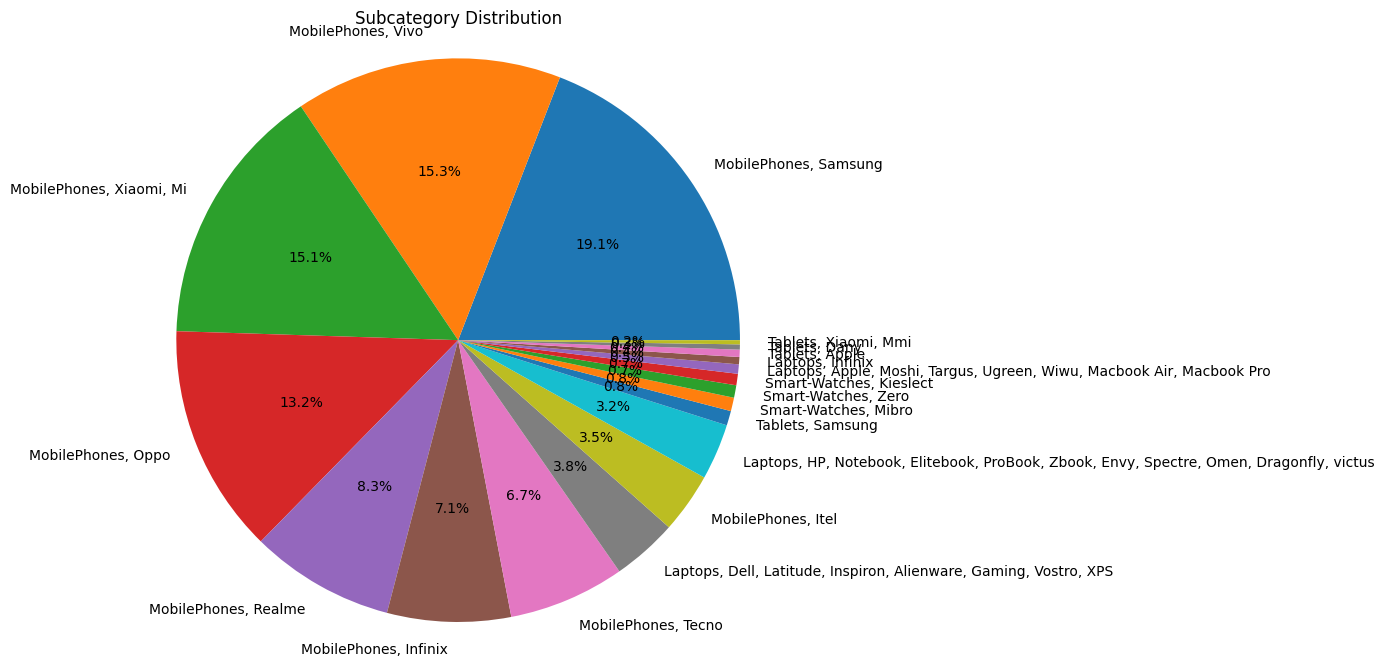

In [321]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each subcategory
subcategory_counts = df['product_category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(subcategory_counts, labels=subcategory_counts.index, autopct='%1.1f%%')
plt.title('Subcategory Distribution')
plt.axis('equal')

# Display the chart
plt.show()

In [322]:
df['product_price'] = pd.to_numeric(df['product_price'].str.replace(',', '').str.replace('Rs.', ''))

In [323]:
df['rating_count'] = pd.to_numeric(df['rating_count'].str.replace(' Ratings', ''))

In [324]:
df['product_price'] = df['product_price'] / 17.73
df['product_price'] = df['product_price'].round(2)

In [325]:
df['category'] = df['product_category'].str.split(',').str[0]

In [326]:
df['brand'] = df['product_category'].str.split(',').str[1]

In [327]:
df.drop('product_category', axis=1, inplace=True)

In [328]:
df

,product_name,product_price,product_ratings,rating_count,description,category,brand
0,Mibro A2 Bluetooth Calling Smart Watch,468.08,5.0,8,"{'Display': '1.39 inches', 'Screen Type': 'HD ...",Smart-Watches,Mibro
1,Mibro Watch Lite2,733.16,5.0,79,"{'Display': '1.3 Inches', 'Screen Type': 'Amol...",Smart-Watches,Mibro
2,Mibro GS Pro Calling Smart Watch,902.37,5.0,5,"{'Display': '1.43', 'Screen Type': 'AMOLED', '...",Smart-Watches,Mibro
3,Mibro T1 Smart Watch,789.57,5.0,79,"{'Display': '1.6 Inch', 'Screen Type': 'AMOLED...",Smart-Watches,Mibro
4,Mibro Smart Watch T2,789.57,5.0,1,"{'Display': '1.75 Inches', 'Screen Type': 'AMO...",Smart-Watches,Mibro
...,...,...,...,...,...,...,...
1674,Dany Signature S8,1624.31,5.0,11,"{'Display': '8.0 Inches', 'RAM': '4GB', 'Type'...",Tablets,Dany
1675,Dany Genius Max5,975.69,5.0,1,"{'Display': '7 Inches', 'RAM': '1GB', 'Type': ...",Tablets,Dany
1676,Dany Monster 4G LTE,1032.09,5.0,3,"{'Display': '7 inch', 'RAM': '2GB', 'Type': '2...",Tablets,Dany
1677,Dany Monster 4G Ultra Tablet,1122.34,5.0,6,"{'Display': '7 inches', 'RAM': '3GB', 'Type': ...",Tablets,Dany


In [330]:
df.to_csv('elecrtonic_clean.csv', index=False)